# 연도별이혼+동거기간

수도권이 아닌 지역이 수도권보다 같이사는기간(동거기간)이 길다 는 가설을 세움

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob

<AxesSubplot: title={'center': '한글'}>

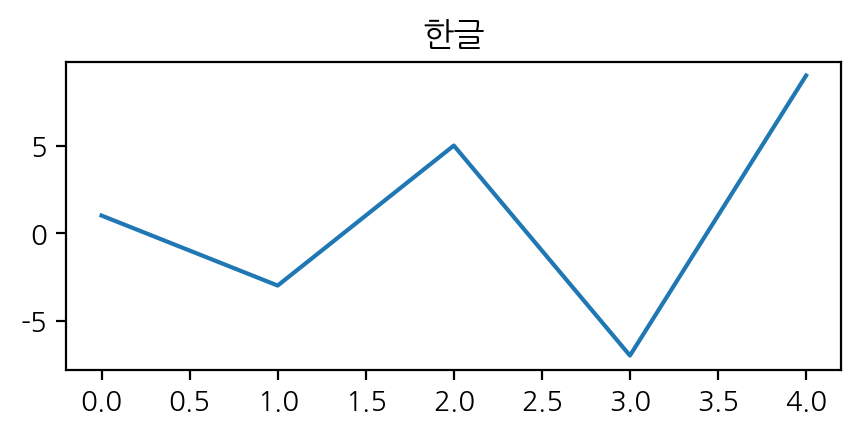

In [3]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# 한글사용가능 확인
plt.figure(figsize=(5,2))
pd.Series([1,-3,5,-7,9]).plot(title="한글")

In [5]:
file_url = r"https://ais7.s3.ap-northeast-2.amazonaws.com/%EC%8B%9C%EB%8F%84_%ED%98%BC%EC%9D%B8%EC%A7%80%EC%86%8D%EA%B8%B0%EA%B0%84_%EB%8F%99%EA%B1%B0%EA%B8%B0%EA%B0%84_%EB%B3%84_%EC%9D%B4%ED%98%BC.csv"

In [6]:
# 파일로드해서 크기확인
divorce = pd.read_csv(file_url, encoding="cp949")
divorce.shape

(190, 13)

# 데이터 미리보기
- head
- tail
- sample

In [7]:
divorce.head(2)

,시도별,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전국,계,124072,116535,123999,116858,114284,114316,115292,115510,109153,107328,106032
1,전국,0∼4년,33670,33114,33718,31528,30689,28205,27299,27162,24666,24597,23749


In [8]:
divorce.tail(2)

,시도별,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
188,국외,30년이상,30,30,22,28,46,55,53,67,65,49,54
189,국외,미상,0,0,0,0,0,0,0,0,0,0,0


In [9]:
divorce.sample()

,시도별,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
173,제주특별자치도,10∼14년,291,219,232,234,229,215,229,226,232,221,218


In [10]:
# 데이터 요약
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도별     190 non-null    object
 1   동거기간별   190 non-null    object
 2   2007    190 non-null    int64 
 3   2008    190 non-null    int64 
 4   2009    190 non-null    int64 
 5   2010    190 non-null    int64 
 6   2011    190 non-null    int64 
 7   2012    190 non-null    int64 
 8   2013    190 non-null    int64 
 9   2014    190 non-null    int64 
 10  2015    190 non-null    int64 
 11  2016    190 non-null    int64 
 12  2017    190 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 19.4+ KB


In [11]:
# 데이터 기술통계
divorce.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,2875.147368,2736.968421,2907.989474,2753.042105,2703.863158,2724.894737,2768.600000,2780.631579,2641.389474,2602.631579,2580.926316
std,10175.024689,9591.887109,10172.627892,9579.832804,9389.809489,9390.830001,9484.382161,9504.131183,8998.032939,8849.772763,8759.640738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,217.250000,218.000000,256.500000,244.250000,257.250000,261.250000,289.500000,306.750000,297.250000,292.000000,319.500000
50%,683.500000,617.500000,694.500000,649.500000,639.000000,634.500000,696.500000,679.500000,646.000000,635.500000,604.500000
75%,1587.250000,1507.750000,1575.750000,1571.500000,1534.750000,1458.500000,1560.500000,1523.750000,1505.500000,1538.000000,1522.000000
max,124072.000000,116535.000000,123999.000000,116858.000000,114284.000000,114316.000000,115292.000000,115510.000000,109153.000000,107328.000000,106032.000000


In [12]:
divorce.describe(include="object")

,시도별,동거기간별
count,190,190
unique,19,10
top,전국,계
freq,10,19


# 필요없는 열 제거

In [13]:
# 20년이상 컬럼 제거 
# 왜 제거하냐면 계의 값이 달라지기떄문
divorce = divorce.drop(index=divorce.loc[divorce["동거기간별"]=="20년이상"].index)

In [14]:
# 계도 제거 
# 왜냐면 sum함수를 쓰려고
divorce = divorce.drop(index=divorce.loc[divorce["동거기간별"]=="계"].index)

In [15]:
# 국내를 기준으로 확인예정이니, 국외 행을 제거
divorce = divorce.drop(divorce.index[-8:])

In [16]:
# 제거되었는지 확인
divorce.head(10)

,시도별,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,0∼4년,33670,33114,33718,31528,30689,28205,27299,27162,24666,24597,23749
2,전국,5∼9년,25493,21694,23636,21963,21700,21549,21533,21962,20796,20606,20471
3,전국,10∼14년,21662,18307,19986,18638,17370,17694,16851,16283,14860,14663,14842
4,전국,15∼19년,18252,16478,18398,16906,16226,16635,17176,16963,16205,14868,13846
6,전국,20∼24년,11742,11903,12752,12595,12638,13552,14351,14195,13380,12826,12606
7,전국,25∼29년,7163,7894,8269,7746,7712,8034,8706,8626,8815,8961,8938
8,전국,30년이상,6090,7145,7240,7482,7949,8647,9376,10319,10431,10807,11580
9,전국,미상,0,0,0,0,0,0,0,0,0,0,0
11,서울특별시,0∼4년,6428,6355,6311,5440,5083,4538,4287,4380,3750,3760,3541
12,서울특별시,5∼9년,4900,4105,4448,4164,3993,3825,3687,3447,3208,3147,3006


# 결측치제거

In [17]:
# 미상의 0 값을 nan값으로 변경
divorce.loc[divorce["동거기간별"]=="미상"] = divorce.loc[divorce["동거기간별"]=="미상"].replace(0,np.nan)

In [18]:
# isnull을 통해 결측치 확인
divorce.isnull().head(10)
# 9열에 미상 true값 확인가능

,시도별,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,True,True,True,True,True,True,True,True,True,True,True
11,False,False,False,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# isnull().sum()을 통해 결측치 구하기
divorce.isnull().sum()

시도별       0
동거기간별     0
2007     18
2008     18
2009     18
2010     18
2011     18
2012     18
2013     18
2014     18
2015     18
2016     18
2017     18
dtype: int64

<AxesSubplot: >

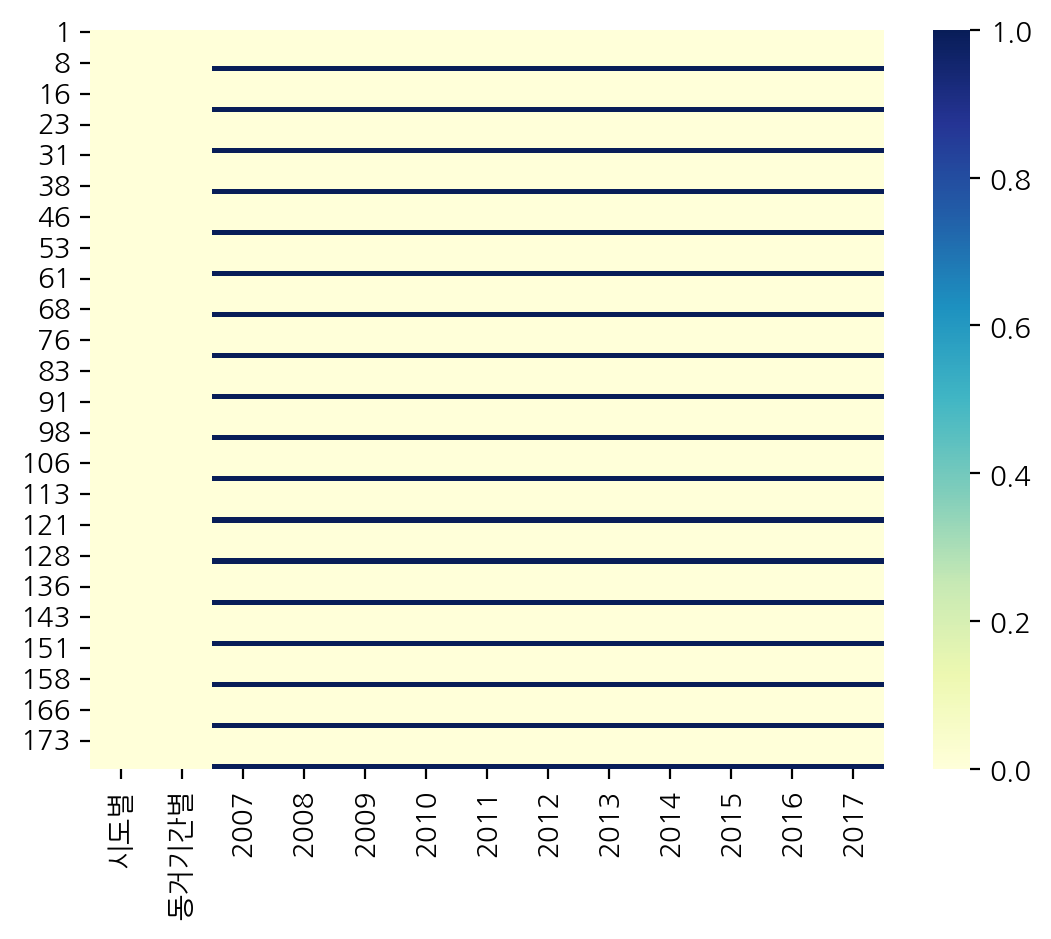

In [20]:
# heatmap로 결측치 확인가능
sns.heatmap(divorce.isnull(),cmap="YlGnBu")

In [21]:
# 결측치제거
divorce = divorce.dropna()

# 데이터타입 변경 

In [22]:
# dtypes를 통해 컬럼의 타입을 확인
divorce.dtypes

시도별       object
동거기간별     object
2007     float64
2008     float64
2009     float64
2010     float64
2011     float64
2012     float64
2013     float64
2014     float64
2015     float64
2016     float64
2017     float64
dtype: object

In [23]:
# object타입을 index로 지정
divorce.set_index(["시도별","동거기간별"],inplace=True)
# 모든 float타입을 int로 변경
divorce = divorce.astype("int")
# index 초기화
divorce.reset_index(inplace=True)
# 시도별을 index로 설정
divorce.set_index(["시도별"],inplace=True)
# int형으로 변경된것을 확인
divorce.dtypes

동거기간별    object
2007      int32
2008      int32
2009      int32
2010      int32
2011      int32
2012      int32
2013      int32
2014      int32
2015      int32
2016      int32
2017      int32
dtype: object

# 빈도수구하기

In [24]:
divorce.value_counts()

동거기간별   2007   2008   2009   2010   2011   2012   2013   2014   2015   2016   2017 
0∼4년    0      0      0      0      0      64     74     76     94     90     116      1
25∼29년  218    255    309    279    287    268    313    306    318    319    321      1
30년이상   93     107    119    134    149    187    168    191    186    190    231      1
        48     59     70     56     86     74     84     99     99     115    116      1
        0      0      0      0      0      15     15     25     25     24     33       1
                                                                                      ..
15∼19년  224    179    228    253    196    205    216    249    186    220    197      1
        0      0      0      0      0      19     30     35     57     42     55       1
10∼14년  21662  18307  19986  18638  17370  17694  16851  16283  14860  14663  14842    1
        5367   4502   4853   4556   4427   4450   4218   4258   3775   3658   3800     1
5∼9년    25493  21694  2363

In [25]:
# 시도별 그룹화해버리기
divorce = divorce.groupby(["시도별"],as_index = True)
# 그룹화한 시도별에서 강원도값만 가져와보기
divorce.get_group("강원도")

,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
시도별,,,,,,,,,,,,
강원도,0∼4년,1032,958,966,959,923,891,927,864,740,807,758
강원도,5∼9년,779,670,738,693,636,619,664,651,643,621,574
강원도,10∼14년,693,563,605,610,593,574,545,539,497,497,459
강원도,15∼19년,509,460,521,492,535,531,576,525,561,483,452
강원도,20∼24년,375,332,407,359,395,402,452,440,444,399,378
강원도,25∼29년,246,218,279,222,246,234,241,271,271,286,282
강원도,30년이상,184,193,226,244,234,299,320,340,328,389,360


In [26]:
# 시도별로 변수할당
divorce_korea = divorce.get_group("전국")
divorce_seoul = divorce.get_group("서울특별시")
divorce_busan = divorce.get_group("부산광역시")
divorce_daegu = divorce.get_group("대구광역시")
divorce_incheon = divorce.get_group("인천광역시")
divorce_gwangju = divorce.get_group("광주광역시")
divorce_daejeon = divorce.get_group("대전광역시")
divorce_ulsan = divorce.get_group("울산광역시")
divorce_sejong = divorce.get_group("세종특별자치시")
divorce_gyeonggi = divorce.get_group("경기도")
divorce_gangwon = divorce.get_group("강원도")
divorce_chungbuk = divorce.get_group("충청북도")
divorce_chungnam = divorce.get_group("충청남도")
divorce_jeonbuk = divorce.get_group("전라북도")
divorce_jeonnam = divorce.get_group("전라남도")
divorce_gyeongbuk = divorce.get_group("경상북도")
divorce_gyeongnam = divorce.get_group("경상남도")
divorce_jeju = divorce.get_group("제주특별자치도")

In [27]:
divorce.get_group("세종특별자치시")

,동거기간별,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
시도별,,,,,,,,,,,,
세종특별자치시,0∼4년,0,0,0,0,0,64,74,76,94,90,116
세종특별자치시,5∼9년,0,0,0,0,0,48,49,53,63,63,95
세종특별자치시,10∼14년,0,0,0,0,0,45,29,41,36,43,78
세종특별자치시,15∼19년,0,0,0,0,0,19,30,35,57,42,55
세종특별자치시,20∼24년,0,0,0,0,0,17,27,36,36,46,58
세종특별자치시,25∼29년,0,0,0,0,0,15,16,14,13,35,30
세종특별자치시,30년이상,0,0,0,0,0,15,15,25,25,24,33


In [28]:
divorce.corr()

C:\Users\tpfl1\AppData\Local\Temp\ipykernel_10360\3332814392.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  divorce.corr()


2007      2008      2009      2010      2011      2012  \
시도별                                                                     
강원도  2007  1.000000  0.993380  0.995140  0.993935  0.986547  0.974942   
     2008  0.993380  1.000000  0.996973  0.997781  0.992386  0.986695   
     2009  0.995140  0.996973  1.000000  0.994071  0.990569  0.980689   
     2010  0.993935  0.997781  0.994071  1.000000  0.992812  0.991092   
     2011  0.986547  0.992386  0.990569  0.992812  1.000000  0.994759   
...             ...       ...       ...       ...       ...       ...   
충청북도 2013  0.962058  0.988056  0.984037  0.989337  0.996155  0.992560   
     2014  0.962593  0.989600  0.981138  0.987271  0.995366  0.991791   
     2015  0.963708  0.973676  0.977796  0.979485  0.981847  0.986007   
     2016  0.962747  0.977910  0.977783  0.984682  0.985976  0.991230   
     2017  0.952239  0.966198  0.957945  0.957558  0.968736  0.955068   

               2013      2014      2015      2016      2017  
시도별                                                          
강원도  2007  0.956159  0.968736  0.938219  0.946035  0.946293  
     2008  0.975299  0.985188  0.947634  0.971130  0.973613  
     2009  0.973109  0.982062  0.957603  0.960489  0.962745  
     2010  0.977187  0.987122  0.952327  0.973682  0.973468  
     2011  0.984375  0.985556  0.958885  0.959195  0.961306  
...             ...       ...       ...       ...       ...  
충청북도 2013  1.000000  0.996166  0.991709  0.995666  0.970877  
     2014  0.996166  1.000000  0.985448  0.988185  0.978965  
     2015  0.991709  0.985448  1.000000  0.995863  0.970545  
     2016  0.995666  0.988185  0.995863  1.000000  0.965185  
     2017  0.970877  0.978965  0.970545  0.965185  1.000000  

[198 rows x 11 columns]

In [42]:
divorce_korea.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,17724.571429,16647.857143,17714.142857,16694.00000,16326.285714,16330.857143,16470.285714,16501.428571,15593.285714,15332.571429,15147.428571
std,10108.477496,9026.137997,9312.733978,8498.66113,8106.088755,7138.819824,6565.560390,6445.809927,5594.450635,5502.476075,5193.856238
min,6090.000000,7145.000000,7240.000000,7482.00000,7712.000000,8034.000000,8706.000000,8626.000000,8815.000000,8961.000000,8938.000000
25%,9452.500000,9898.500000,10510.500000,10170.50000,10293.500000,11099.500000,11863.500000,12257.000000,11905.500000,11816.500000,12093.000000
50%,18252.000000,16478.000000,18398.000000,16906.00000,16226.000000,16635.000000,16851.000000,16283.000000,14860.000000,14663.000000,13846.000000
75%,23577.500000,20000.500000,21811.000000,20300.50000,19535.000000,19621.500000,19354.500000,19462.500000,18500.500000,17737.000000,17656.500000
max,33670.000000,33114.000000,33718.000000,31528.00000,30689.000000,28205.000000,27299.000000,27162.000000,24666.000000,24597.000000,23749.000000


In [43]:
divorce_seoul.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,3516.428571,3331.285714,3417.142857,3109.714286,2945.285714,2882.428571,2875.142857,2782.428571,2596.571429,2539.571429,2440.428571
std,1749.939509,1547.517013,1592.630050,1342.499127,1242.070142,1021.578820,881.818089,895.297317,689.123805,691.826533,630.239335
min,1617.000000,1873.000000,1813.000000,1597.000000,1535.000000,1609.000000,1720.000000,1643.000000,1671.000000,1666.000000,1657.000000
25%,2115.500000,2237.000000,2205.500000,2171.500000,2084.500000,2226.500000,2339.500000,2325.000000,2265.000000,2237.000000,2137.500000
50%,3568.000000,3243.000000,3384.000000,3051.000000,2916.000000,2847.000000,2796.000000,2562.000000,2369.000000,2341.000000,2212.000000
75%,4385.500000,3687.000000,4000.500000,3668.500000,3457.000000,3365.000000,3322.000000,3121.000000,2928.000000,2768.000000,2699.000000
max,6428.000000,6355.000000,6311.000000,5440.000000,5083.000000,4538.000000,4287.000000,4380.000000,3750.000000,3760.000000,3541.000000


In [44]:
divorce_jeonnam.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,605.714286,574.428571,612.857143,618.000000,591.142857,573.000000,585.142857,590.714286,576.142857,566.428571,572.571429
std,384.564565,344.134110,352.857586,344.109963,331.128086,284.557551,272.299730,261.796177,239.760595,224.323321,213.021796
min,189.000000,199.000000,218.000000,252.000000,267.000000,259.000000,294.000000,277.000000,298.000000,305.000000,319.000000
25%,294.500000,314.500000,343.500000,335.000000,366.000000,375.500000,387.500000,406.500000,406.000000,409.000000,428.500000
50%,596.000000,546.000000,649.000000,653.000000,581.000000,544.000000,594.000000,605.000000,542.000000,560.000000,545.000000
75%,810.500000,729.500000,746.500000,767.000000,662.500000,688.000000,677.000000,704.000000,698.500000,673.000000,688.500000
max,1245.000000,1188.000000,1243.000000,1217.000000,1233.000000,1081.000000,1079.000000,1032.000000,984.000000,936.000000,910.000000


<AxesSubplot: >

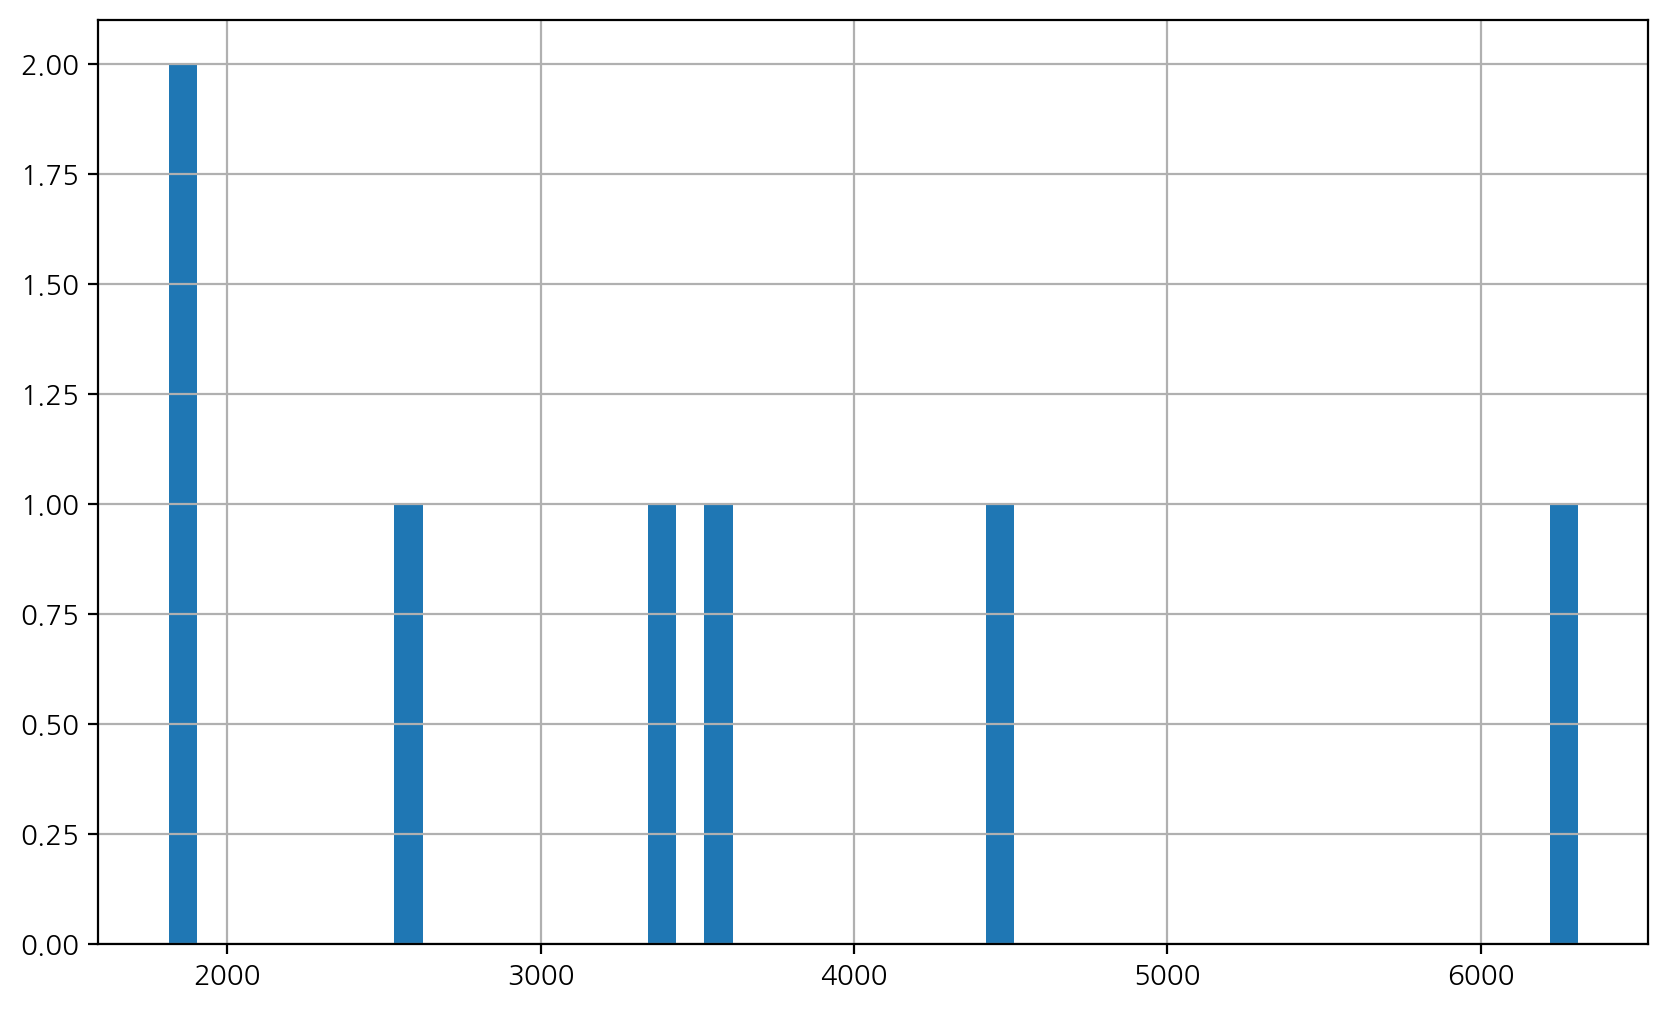

In [29]:
divorce_seoul["2009"].hist(figsize=(10,6), bins=50)

<AxesSubplot: >

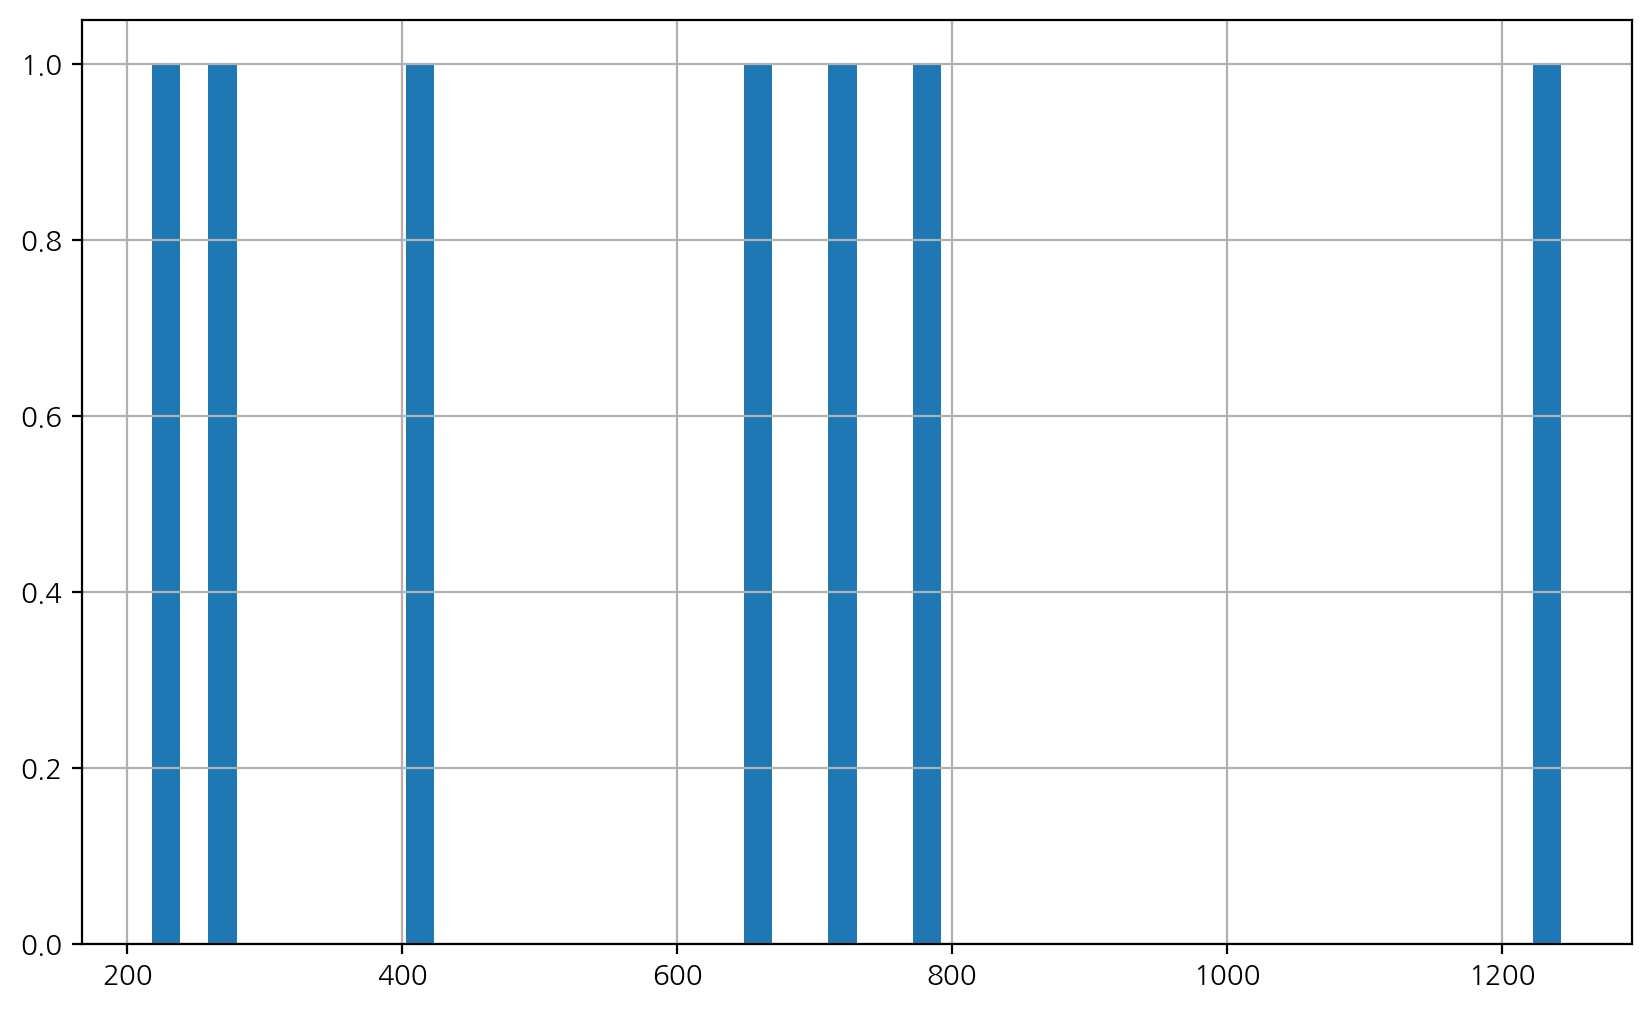

In [39]:
divorce_jeonnam["2009"].hist(figsize=(10,6), bins=50)

<AxesSubplot: >

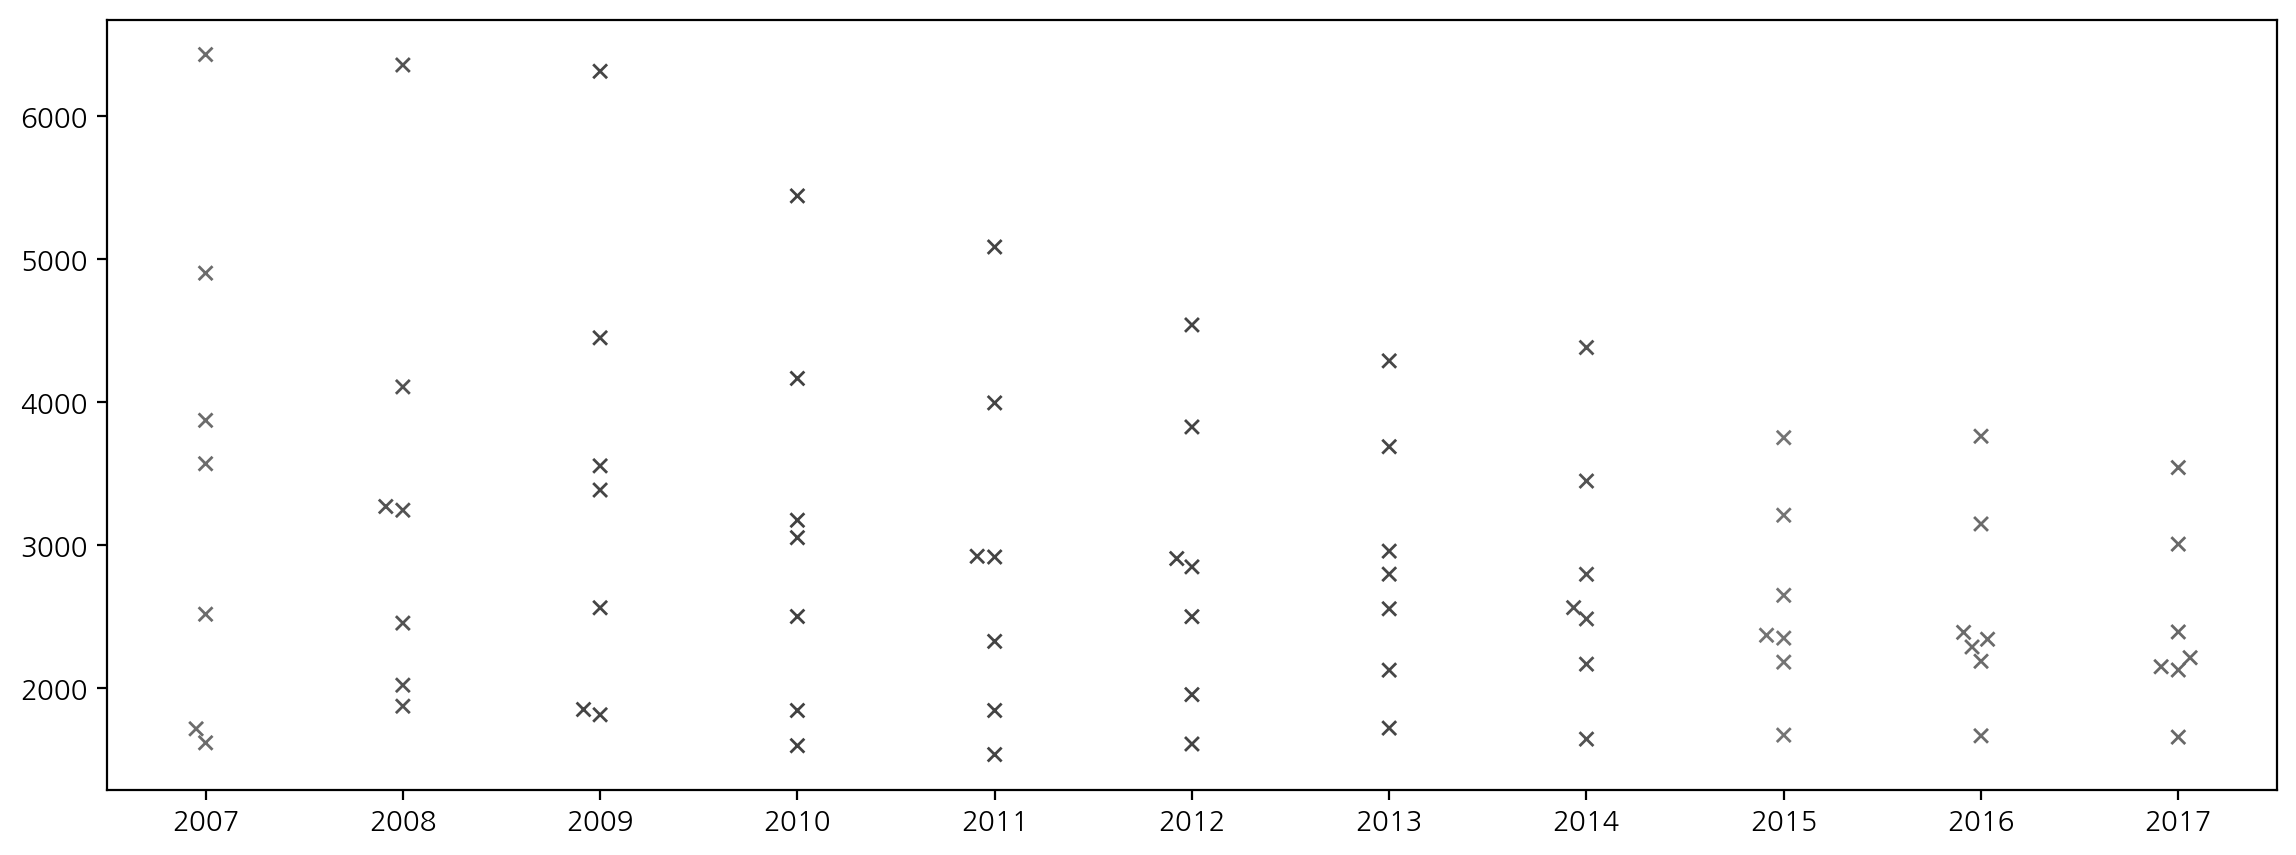

In [40]:
plt.figure(figsize=(14,5))
sns.swarmplot(data=divorce_seoul,marker="x", linewidth=1, )

<AxesSubplot: >

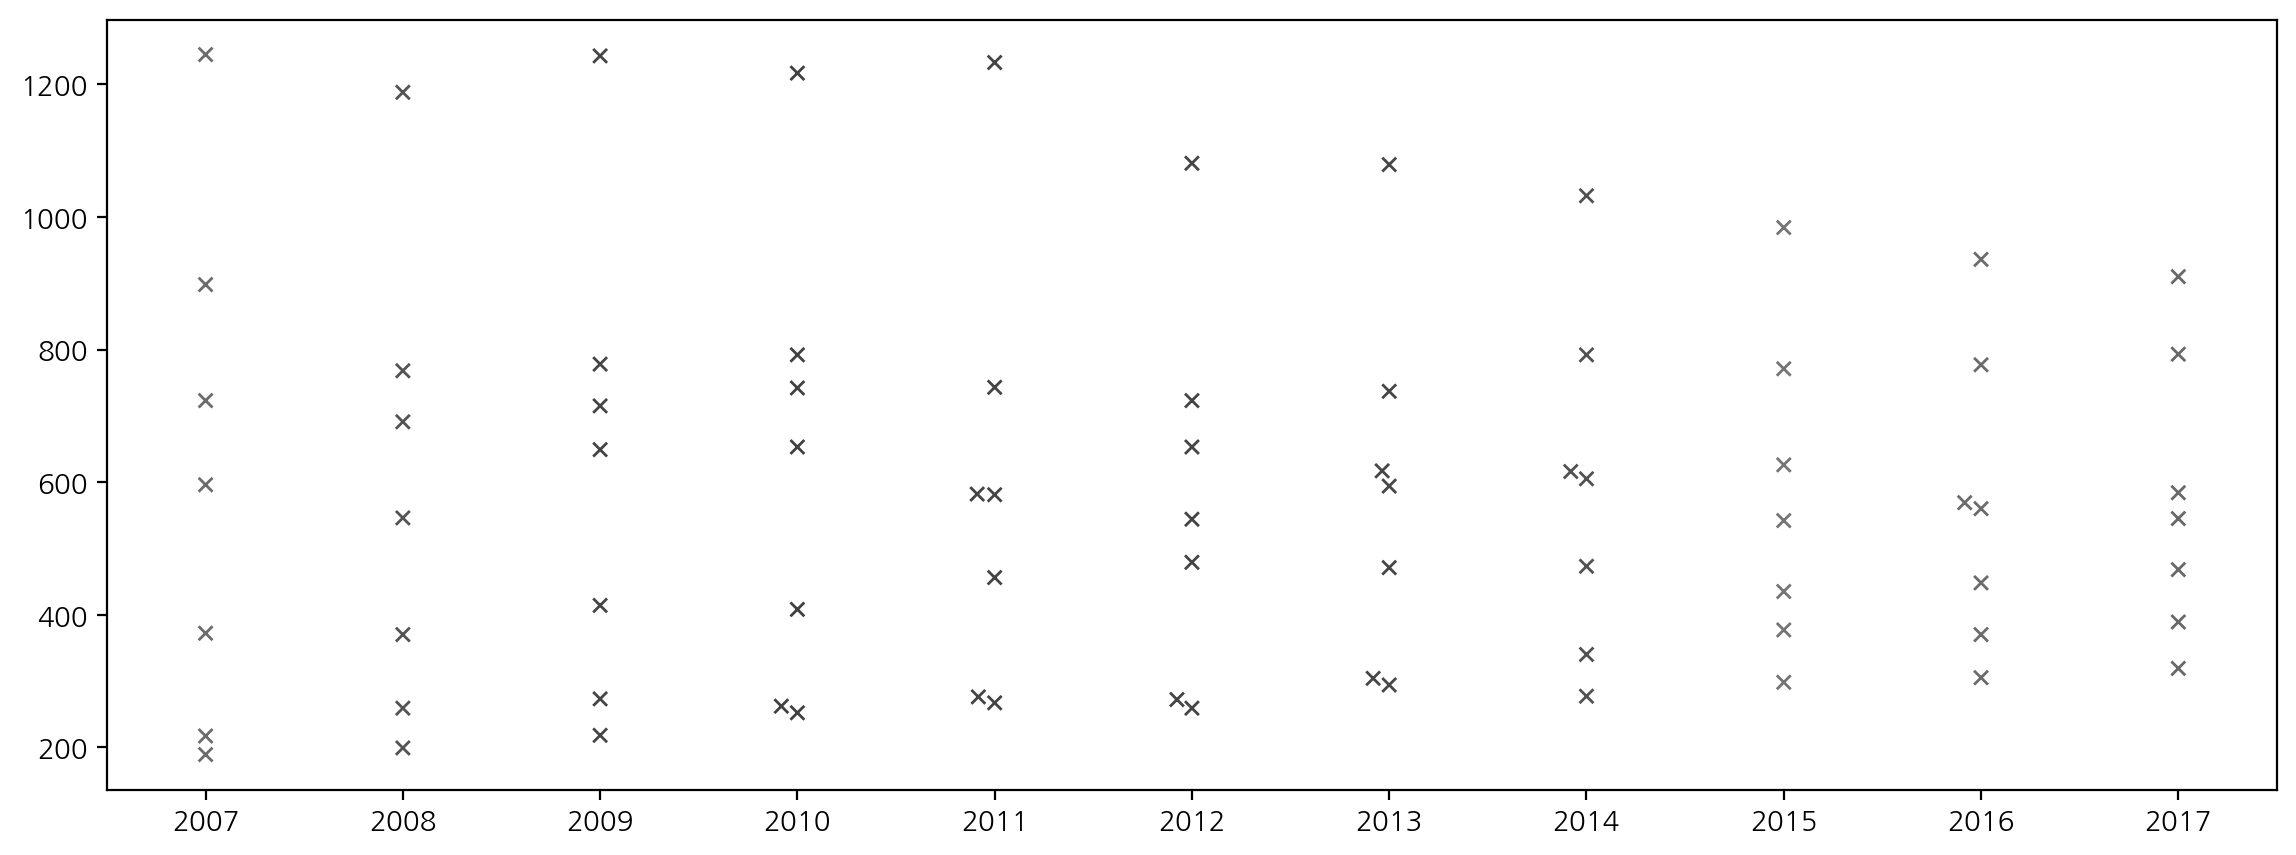

In [41]:
plt.figure(figsize=(14,5))
sns.swarmplot(data=divorce_jeonnam,marker="x", linewidth=1, )

수치 및 시각화를 하여 확인했을때에는 수도권이 이혼율이 높게 나왔다. <br>
그러나 서울의 인구수와 전라남도의 인구수가 다르기때문에 가설을 뒷받침할 인구수 관련 데이터로 추가확인이 필요할것으로 보인다.<br>